### MLP 4: Classification

#### Write your name

- xiaomei Xie
- Lili Hao


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

import warnings

warnings.filterwarnings('ignore')
test_size=0.25

In [2]:
df = pd.read_csv('../processeddata/new_airlines_Normalized.csv')
df.head(2)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,# of Delays.Carrier,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,...,Flights.Total,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Total,Minutes Delayed.Weather,Time.Month.level,Rate,Ratio_Rank
0,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2003/06,6,June,2003,0.301513,0.270412,0.350472,0.189474,...,0.770892,0.258823,0.185741,0.194317,0.104668,0.260628,0.253219,3.0,0.797538,2.0
1,BOS,"Boston, MA: Logan International",2003/06,6,June,2003,0.088067,0.093018,0.069295,0.042105,...,0.199003,0.066594,0.067780,0.037010,0.020004,0.064041,0.053621,3.0,0.816993,1.0


In [3]:
col = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
       'Flights.Cancelled',
       'Flights.Delayed', 'Flights.Diverted', 'Flights.On Time',
       'Flights.Total', 'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Total', 'Minutes Delayed.Weather']

In [4]:
normalizedData = df[col]
normalizedData.shape
# of fligth on time 

(4408, 17)

In [5]:
Xcol = ['# of Delays.Carrier', "Time.Month",
       '# of Delays.Late Aircraft', '# of Delays.National Aviation System',
       '# of Delays.Security', '# of Delays.Weather',
        'Minutes Delayed.Carrier',
       'Minutes Delayed.Late Aircraft',
       'Minutes Delayed.National Aviation System', 'Minutes Delayed.Security',
       'Minutes Delayed.Weather']

In [6]:
X = normalizedData[Xcol]
print(X.shape)
X.head()

(4408, 11)


,# of Delays.Carrier,Time.Month,# of Delays.Late Aircraft,# of Delays.National Aviation System,# of Delays.Security,# of Delays.Weather,Minutes Delayed.Carrier,Minutes Delayed.Late Aircraft,Minutes Delayed.National Aviation System,Minutes Delayed.Security,Minutes Delayed.Weather
0,0.301513,6,0.270412,0.350472,0.189474,0.403206,0.258823,0.185741,0.194317,0.104668,0.253219
1,0.088067,6,0.093018,0.069295,0.042105,0.080148,0.066594,0.067780,0.037010,0.020004,0.053621
2,0.061849,6,0.088924,0.036424,0.094737,0.094945,0.035474,0.063728,0.025609,0.056173,0.080223
3,0.063193,6,0.087787,0.074847,0.031579,0.065351,0.040725,0.053647,0.036017,0.025662,0.048824
4,0.057479,6,0.041392,0.047307,0.052632,0.070284,0.036125,0.025243,0.031345,0.024247,0.053373


In [7]:
y = normalizedData["Flights.On Time"]
y.head()

0    0.745664
1    0.199287
2    0.169523
3    0.170304
4    0.112608
Name: Flights.On Time, dtype: float64

In [8]:
X = X.to_numpy()
print(type(X))

y = y.to_numpy()
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

### (3) Regularized linear regression models with feature normalization
### Ridge regression model

#### alpha

In [10]:
print('Ridge regression: effect of alpha regularization parameter\n')
train_errors = []
test_errors = []

train_R_sq= []
test_R_sq = []

alpha_sizes = [0, 0.0001, 0.001, 0.01, 0.02, 0.05, 0.075, 0.1,0.2]#,0.3,0.4, 0.5, 0.6, 0.7,0.8,0.9, 1]

for this_alpha in alpha_sizes:
    linridge = RidgeCV(alphas = [this_alpha],cv = 10).fit(X_train, y_train)
    
    r2_train = linridge.score(X_train, y_train)
    train_R_sq.append(r2_train)
    r2_test = linridge.score(X_test, y_test)
    test_R_sq.append(r2_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
                    r-squared training: {:.2f}, r-squared test: {:.2f}'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))
    
    y_pred = linridge.predict(X_train)
    train_error = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.3f}'.format(train_error))
    train_errors.append(train_error)

    # make predictions on the testing set
    y_pred = linridge.predict(X_test)
    test_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.3f}\n'.format(test_error))
    test_errors.append(test_error)

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 3,                     r-squared training: 0.76, r-squared test: 0.72
Training RMSE: 0.091
Testing RMSE: 0.092

Alpha = 0.00
num abs(coeff) > 1.0: 3,                     r-squared training: 0.76, r-squared test: 0.72
Training RMSE: 0.091
Testing RMSE: 0.092

Alpha = 0.00
num abs(coeff) > 1.0: 3,                     r-squared training: 0.76, r-squared test: 0.72
Training RMSE: 0.091
Testing RMSE: 0.092

Alpha = 0.01
num abs(coeff) > 1.0: 3,                     r-squared training: 0.76, r-squared test: 0.72
Training RMSE: 0.091
Testing RMSE: 0.092

Alpha = 0.02
num abs(coeff) > 1.0: 3,                     r-squared training: 0.76, r-squared test: 0.72
Training RMSE: 0.091
Testing RMSE: 0.092

Alpha = 0.05
num abs(coeff) > 1.0: 3,                     r-squared training: 0.75, r-squared test: 0.72
Training RMSE: 0.091
Testing RMSE: 0.092

Alpha = 0.07
num abs(coeff) > 1.0: 3,                     

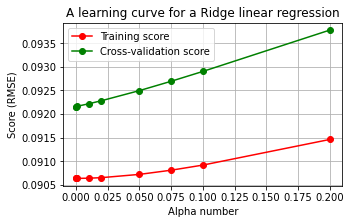

In [11]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Ridge linear regression')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_errors, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_errors, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### training and test data split

In [12]:
# change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
train_sizes = np.linspace(0.1, 0.90, 10)

linridge = Ridge(alpha=0.01)

train_sizes, train_mse, test_mse = \
            learning_curve(linridge, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)


training RMSE:  [0.08829321 0.09005763 0.09017083 0.09017668 0.09000425 0.08995185
 0.09001061 0.09058182 0.09042759 0.09093699]
testing RMSE:  [0.09448705 0.09518036 0.09535508 0.09479349 0.09423852 0.09387219
 0.09382304 0.09368041 0.09365472 0.09372435]


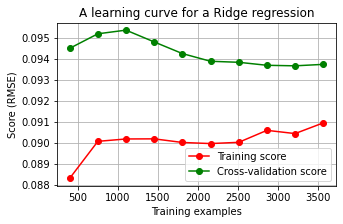

In [13]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Ridge regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### K cross validation¶

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [15]:
from sklearn.linear_model import RidgeCV

linridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv = 10).fit(X, y)

print('ridge regression linear model alpha: {}'.format(linridge.alpha_))
print('ridge regression linear model intercept: {}'.format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linridge.coef_))

print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))

print('R-squared score (test): {:.3f}'.format(linridge.best_score_))

# make predictions on the testing set and print RMSE
y_pred = linridge.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

ridge regression linear model alpha: 0.01
ridge regression linear model intercept: 0.05326624190019896
ridge regression linear model coeff:
[-7.51221573e-01  1.40563423e-03  2.26520330e+00  7.33966247e-01
 -1.83874613e-01 -4.90124409e-02  1.75921802e+00 -2.45620003e+00
 -3.80424359e-01  2.50906901e-01 -2.30620238e-01]
R-squared score (training): 0.746
R-squared score (test): 0.727
RMSE: 0.087


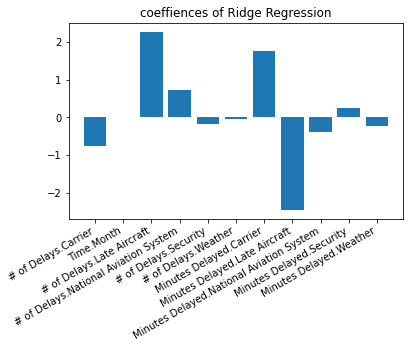

In [16]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, linridge.coef_, width=0.8, bottom=None, align='center')
plt.title("coeffiences of Ridge Regression")
fig.autofmt_xdate()

In [17]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linridge, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

print('Lasso regression linear model intercept: {}'.format(linridge.intercept_))
print('Lasso regression linear model coeff:\n{}'.format(linridge.coef_))
# train data R2
print('R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linridge.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Lasso regression linear model intercept: 0.05326624190019896
Lasso regression linear model coeff:
[-7.51221573e-01  1.40563423e-03  2.26520330e+00  7.33966247e-01
 -1.83874613e-01 -4.90124409e-02  1.75921802e+00 -2.45620003e+00
 -3.80424359e-01  2.50906901e-01 -2.30620238e-01]
R-squared score (training): 0.741
R-squared score (test): 0.751
RMSE: 0.087


### Lasso regression model

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

#### alpha

In [19]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')


train_scores_mean = []
test_scores_mean = []

alpha_sizes = [0.0, 0.0000001,0.0000005,0.000001,0.000005, 0.00001,0.00005, 0.0001]
#, 0.001, 0.01, 0.025, 0.05, 0.075, 0.25, 0.5, 1, 5]

for this_alpha in alpha_sizes:
    #linlasso = Lasso(alpha, max_iter = 10000).fit(X_train, y_train)
    #linlasso = RidgeCV(alphas = [this_alpha],cv = 10).fit(X_train, y_train)
    linlasso = LassoCV(alphas=[this_alpha], cv = 10).fit(X_train, y_train)
    r2_train = linlasso.score(X_train, y_train)
    r2_test = linlasso.score(X_test, y_test)
    
    print('Alpha = {:.8f}\nFeatures kept: {}, r-squared training: {:.8f}, \
r-squared test: {:.8f}'
         .format(this_alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
    
    y_pred = linlasso.predict(X_train)
    train_score_mean = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
    print('Training RMSE: {:.8f}'.format(train_score_mean))
    train_scores_mean.append(train_score_mean)

    # make predictions on the testing set
    y_pred = linlasso.predict(X_test)
    test_score_mean = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    print('Testing RMSE: {:.8f}\n'.format(test_score_mean))
    test_scores_mean.append(test_score_mean)

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.00000000
Features kept: 11, r-squared training: 0.74858126, r-squared test: 0.74382636
Training RMSE: 0.09172039
Testing RMSE: 0.08886510

Alpha = 0.00000010
Features kept: 11, r-squared training: 0.74858126, r-squared test: 0.74382925
Training RMSE: 0.09172039
Testing RMSE: 0.08886460

Alpha = 0.00000050
Features kept: 11, r-squared training: 0.74858109, r-squared test: 0.74384006
Training RMSE: 0.09172042
Testing RMSE: 0.08886273

Alpha = 0.00000100
Features kept: 11, r-squared training: 0.74858055, r-squared test: 0.74385368
Training RMSE: 0.09172052
Testing RMSE: 0.08886037

Alpha = 0.00000500
Features kept: 11, r-squared training: 0.74856327, r-squared test: 0.74394737
Training RMSE: 0.09172367
Testing RMSE: 0.08884411

Alpha = 0.00001000
Features kept: 11, r-squared training: 0.74850866, r-squared test: 0.74402279
Training RMSE: 0.09173363
Testing RMSE: 0.08883103

Alph

In [20]:
print(train_scores_mean)

[0.09172038934172623, 0.09172039069367897, 0.09172042197255778, 0.09172051995422735, 0.09172367234621796, 0.09173363108015153, 0.09205687112800771, 0.09303197639981976]


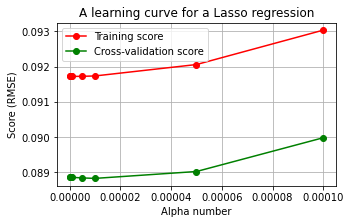

In [21]:
# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

ax.set_title('A learning curve for a Lasso regression')
ax.set_xlabel("Alpha number")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(alpha_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(alpha_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### training and test data split

training RMSE:  [0.08797124 0.08997625 0.09013308 0.09015459 0.08998921 0.08994146
 0.09000286 0.09057587 0.09042302 0.09093338]
testing RMSE:  [0.09451882 0.0951805  0.09540034 0.09480738 0.09424749 0.09388147
 0.09383007 0.09368191 0.09366024 0.09372925]


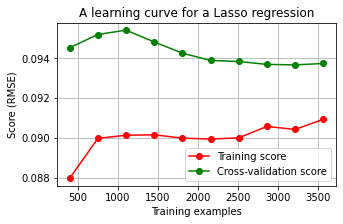

In [22]:
 # change the parameter values for range of lower and upper bound of training data size
# and the number of iterations, and see the changes in the learning curve. 
linlasso = Lasso(alpha=0.000001)

train_sizes = np.linspace(0.1, 0.90, 10)

train_sizes, train_mse, test_mse = \
            learning_curve(linlasso, X, y, scoring='neg_mean_squared_error', 
                           train_sizes = train_sizes, cv=10, shuffle=True, random_state=1)
    
train_scores = np.sqrt(np.abs(train_mse))
test_scores = np.sqrt(np.abs(test_mse))
#print(train_scores)
#print(test_scores)

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
print("training RMSE: ",train_scores_mean)
print("testing RMSE: ", test_scores_mean)

# Plot learning curve
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    
ax.set_title('A learning curve for a Lasso regression')
ax.set_xlabel("Training examples")
ax.set_ylabel("Score (RMSE)")
ax.grid()

ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax.legend(loc="best")

plt.show()

#### K cross validation¶

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [24]:


linlasso = LassoCV(alphas=[1e-6,1e-5,1e-4,1e-3, 1e-2, 1e-1, 1], cv = 10).fit(X, y)

print('ridge regression linear model alpha: {}'.format(linlasso.alpha_))
print('ridge regression linear model intercept: {}'.format(linlasso.intercept_))
print('ridge regression linear model coeff:\n{}'.format(linlasso.coef_))

print('R-squared score (training): {:.3f}'.format(linlasso.score(X_train, y_train)))

print('R-squared score (test): {:.3f}'.format(linlasso.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linlasso.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

ridge regression linear model alpha: 1e-06
ridge regression linear model intercept: 0.053299899808700923
ridge regression linear model coeff:
[-7.60985702e-01  1.40289088e-03  2.29477366e+00  7.21622829e-01
 -1.82737858e-01 -4.85448672e-02  1.76935637e+00 -2.49126240e+00
 -3.65743343e-01  2.49583296e-01 -2.29666979e-01]
R-squared score (training): 0.744
R-squared score (test): 0.759
RMSE: 0.090


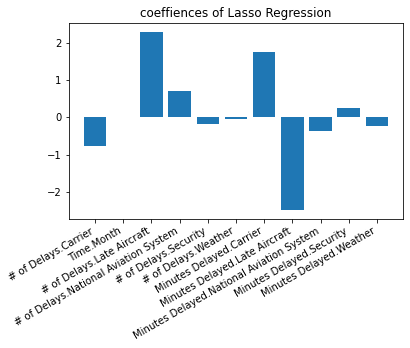

In [25]:
fig = plt.figure()
plt.bar(normalizedData[Xcol].columns, linlasso.coef_, width=0.8, bottom=None, align='center')
plt.title("coeffiences of Lasso Regression")
fig.autofmt_xdate()

In [26]:


score = cross_val_score(linlasso, X_train, y_train, cv=10)
#print(score)
#print(score.sum()/10)

print('Lasso regression linear model intercept: {}'.format(linlasso.intercept_))
print('Lasso regression linear model coeff:\n{}'.format(linlasso.coef_))
# train data R2
print('R-squared score (training): {:.3f}'.format(score.sum()/10))
# test data R2
print('R-squared score (test): {:.3f}'.format(linlasso.score(X_test, y_test)))

# make predictions on the testing set and print RMSE
y_pred = linlasso.predict(X_test)
print('RMSE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Lasso regression linear model intercept: 0.053299899808700923
Lasso regression linear model coeff:
[-7.60985702e-01  1.40289088e-03  2.29477366e+00  7.21622829e-01
 -1.82737858e-01 -4.85448672e-02  1.76935637e+00 -2.49126240e+00
 -3.65743343e-01  2.49583296e-01 -2.29666979e-01]
R-squared score (training): 0.738
R-squared score (test): 0.759
RMSE: 0.090
